# Recognizing Cats and Dogs

In [1]:
!pip install -U fastai

     |████████████████████████████████| 194kB 4.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


Für Beispiele aus Computer Vision sollten wir aus Performancegründen auf jeden in einer GPU-Laufzeitumgebung arbeiten!

In [2]:
!nvidia-smi

Mon Oct  5 10:14:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
data_bunch = ImageDataLoaders.from_name_func(path, get_image_files(path),
                                           valid_pct=0.2,
                                           label_func=lambda x: x[0].isupper(),
                                           item_tfms=Resize(224))
learner = cnn_learner(data_bunch, resnet34, metrics=error_rate)
learner.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.151756,0.047056,0.008796,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.066395,0.032789,0.008119,00:51
1,0.027502,0.003525,0.001353,00:51


Wir verwenden das [Oxford-IIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) für unser erstes Beispiel.

Dieses beinhaltet 7349 Bilder von Hunde und Katzen.

Doch warum funktioniert unser einfacher Klassifizierer bereits derartig gut?

Wir verwenden *Transfer-Learning* und nutzen ein vortrainiertes Modell (`ResNet34`), das wir mit unseren Trainingsdaten weitertrainieren.

Was die Funktion `label_func=lambda x: x[0].isupper()`?

Die Funktion teilt unsere Trainingsdaten in Bilddateien von Hunden und solchen von Katzen. (Katzenfotos beginnen immer mit einem Großbuchstaben)

In [4]:
data_bunch.dataset.items[:10]

[Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_163.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_123.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_72.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_78.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_77.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/pug_64.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_33.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_73.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_140.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_183.jpg')]

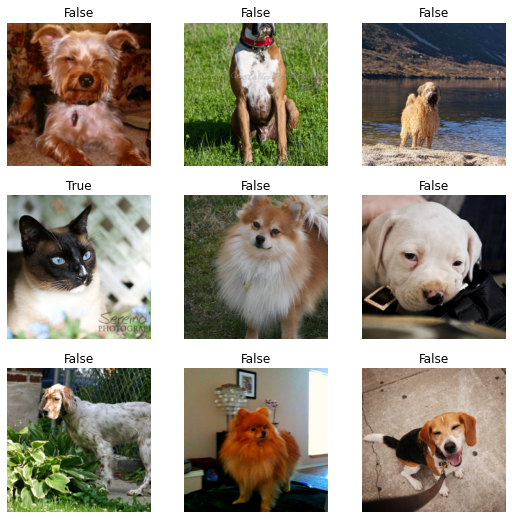

In [6]:
data_bunch.show_batch()

## Testen unseres DL-Modells
Doch wie können wir nun prüfen, ob unser Modell tatsächlich für die Unterscheidung zwischen Hunden und Katzen taugt?

Verwenden wir unser Modell sogleich für die Vorhersagen. Bauen wir dafür ein einfache User-Interface mittels IPythonWidgets auf und testen das Modell mit beliebigen Fotos von Hunden oder Katzen.

In [7]:
import ipywidgets as widgets

In [11]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [12]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learner.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


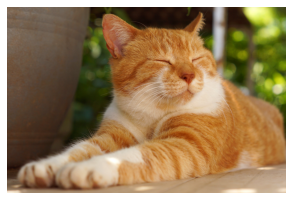

In [13]:
img.show()